In [1]:
from math import pi, sin, cos, sqrt
import matplotlib.pyplot as plt
import numpy as np

In [125]:
# this part adapted from Norbert Wex's code
def Roemer(e, om, order):
    e1 = e*sin(om)
    e2 = e*cos(om)
    x  = []
    yF = []
    yZ = []

    sw = sin(om)
    cw = cos(om)

    ii = 0
    while ii < 1000:

        # mean anomaly
        ma = 2*pi*(ii/1000.0) 

        # eccentric anomaly - solve Kepler's equation (cf. TEMPO)
        u  = ma + e*sin(ma)*(1 + e*cos(ma))
        du = 1
        while abs(du) > 1.0e-14:
            onemecu = 1 - e*cos(u)
            du = (ma - (u - e*sin(u))) / onemecu
            u  = u + du

        # Roemer delay / x
        alpha = sw
        beta  = sqrt(1 - e**2)*cw
        Rx    = alpha*(cos(u) - e) + beta*sin(u)

        #--- approximations ---

        phi = ma + om

        #Lange et al.
        RxL = sin(phi) + ( e2*sin(2*phi) - e1*cos(2*phi) ) / 2

        #Zhu et al.

        RxZ = RxL - ( 5*e2**2*sin(phi) - 3*e2**2*sin(3*phi) - 2*e1*e2*cos(phi) + 6*e1*e2*cos(3*phi) + 3*e1**2*sin(phi) + 3*e1**2*sin(3*phi) ) / 8

        #Third-Order Expression

        RxF = RxZ - ( 3*e1**2*e2*sin(2*phi) + 5*e2**3*sin(2*phi) - 4*e1**3*cos(2*phi) - 6*e1*e2**2*cos(2*phi) - 4*e2**3*sin(4*phi) + 12*e1**2*e2*sin(4*phi) + 12*e1*e2**2*cos(4*phi) - 4*e1**3*cos(4*phi) ) / 12

        #--- diff (modulo constant offset) ---

        constOffsetT = -1.5*e1
        deltaF = RxF - (Rx - constOffsetT)
        deltaZ = RxZ - (Rx - constOffsetT)
        
        x.append(ma)
        yF.append(deltaF)
        yZ.append(deltaZ)

        ii += 1
    if order == "second":
        return x, yZ
    elif order == "third":
        return x, yF
    else:
        print("Order must be 'second' or 'third'")

<Figure size 720x432 with 0 Axes>

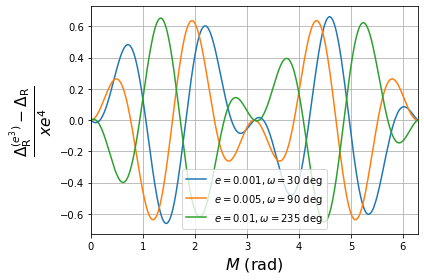

In [126]:
plt.figure(figsize=(10,6))
plt.figure(facecolor='white')

plt.xlabel('$M$ (rad)', fontsize=16)
plt.ylabel('$\\frac{\Delta_\mathrm{R}^{(e^3)} - \Delta_\mathrm{R}}{x e^4}$', fontsize=22)

plt.xlim(0,2*pi)
plt.grid(True)

es  =  [0.001, 0.005, 0.01]                                             
oms =  (pi/180)*np.array([30, 90, 235])

for e, om in zip(es,oms):
    xs, ys = Roemer(e, om, 'third')
    plt.plot(xs, [y*e**-4 for y in ys], '-', label=f'$e = {e}, \omega = {om*180/pi:.0f}$'+'$~\mathrm{deg}$')

plt.legend()
plt.tight_layout()
#plt.savefig("ell1test.png",format="png",dpi=300,bbox_inches='tight')
plt.show()

In [117]:
import pint.toa as toa
import pint.residuals as res
from pint.fitter import WLSFitter
import sys
sys.path.insert(1, '/Users/william/GBNCC/gbncc_viii/data/')

import my_pint_tools as mpt
import numpy as np
from astropy import units as u
from astropy.time import Time
from pint.models import BinaryELL1, parameter, get_model

now = Time.now().to_value('ymdhms')
curdat = f'{now[1]:02}{now[2]}{str(now[0])[2:]}'

In [118]:
tim='/Users/william/GBNCC/gbncc_viii/data/J0214+5222_fiore+23.tim'
par='/Users/william/GBNCC/gbncc_viii/data/J0214+5222_fiore+23.par'
toas=toa.get_TOAs(tim,usepickle=False,planets=True,ephem="DE440");
model=mpt.mod.get_model(par);

2023-05-18 14:24:41.581 | DEBUG    | pint.toa:__init__:1340 - No pulse number flags found in the TOAs
2023-05-18 14:24:41.588 | DEBUG    | pint.toa:apply_clock_corrections:2182 - Applying clock corrections (include_gps = True, include_bipm = True)
2023-05-18 14:24:41.730 | INFO     | pint.observatory:gps_correction:209 - Applying GPS to UTC clock correction (~few nanoseconds)
2023-05-18 14:24:41.733 | INFO     | pint.observatory:bipm_correction:216 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2023-05-18 14:24:41.737 | INFO     | pint.observatory.topo_obs:clock_corrections:342 - Applying observatory clock corrections for observatory='gbt'.
2023-05-18 14:24:42.555 | INFO     | pint.observatory:gps_correction:209 - Applying GPS to UTC clock correction (~few nanoseconds)
2023-05-18 14:24:42.556 | INFO     | pint.observatory:bipm_correction:216 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2023-05-18 14:24:42.558 | INFO     | pint.observatory.topo_obs:clock_co

In [119]:
toas.compute_pulse_numbers(model)

2023-05-18 14:24:44.284 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:96 - Creating and dealing with the single TZR_toa for absolute phase
2023-05-18 14:24:44.288 | DEBUG    | pint.toa:__init__:1340 - No pulse number flags found in the TOAs
2023-05-18 14:24:44.289 | DEBUG    | pint.toa:apply_clock_corrections:2182 - Applying clock corrections (include_gps = True, include_bipm = True)
2023-05-18 14:24:44.291 | INFO     | pint.observatory:gps_correction:209 - Applying GPS to UTC clock correction (~few nanoseconds)
2023-05-18 14:24:44.295 | INFO     | pint.observatory:bipm_correction:216 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2023-05-18 14:24:44.298 | INFO     | pint.observatory.topo_obs:clock_corrections:356 - Observatory lofar requires no clock corrections.
2023-05-18 14:24:44.311 | DEBUG    | pint.toa:compute_TDBs:2233 - Computing TDB columns.
2023-05-18 14:24:44.322 | DEBUG    | pint.toa:compute_TDBs:2254 - Using EPHEM = DE440 for TDB calculation.
2023-05-1

2023-05-18 14:31:19.647 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:96 - Creating and dealing with the single TZR_toa for absolute phase
2023-05-18 14:31:19.651 | DEBUG    | pint.toa:__init__:1340 - No pulse number flags found in the TOAs
2023-05-18 14:31:19.652 | DEBUG    | pint.toa:apply_clock_corrections:2182 - Applying clock corrections (include_gps = True, include_bipm = True)
2023-05-18 14:31:19.654 | INFO     | pint.observatory:gps_correction:209 - Applying GPS to UTC clock correction (~few nanoseconds)
2023-05-18 14:31:19.659 | INFO     | pint.observatory:bipm_correction:216 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2023-05-18 14:31:19.664 | INFO     | pint.observatory.topo_obs:clock_corrections:356 - Observatory lofar requires no clock corrections.
2023-05-18 14:31:19.795 | DEBUG    | pint.toa:compute_TDBs:2233 - Computing TDB columns.
2023-05-18 14:31:19.800 | DEBUG    | pint.toa:compute_TDBs:2254 - Using EPHEM = DE440 for TDB calculation.
2023-05-1

Fitted model using weighted_least_square method with 16 free parameters to 951 TOAs
Prefit residuals Wrms = 77.81854991174426 us, Postfit residuals Wrms = 77.77068529266548 us
Chisq = 933.419 for 934 d.o.f. for reduced Chisq of 0.999

PAR                        Prefit                  Postfit            Units
=================== ==================== ============================ =====
PSR                           J0214+5222 J0214+5222                   None
EPHEM                              DE440 DE440                        None
CLOCK                       TT(BIPM2021) TT(BIPM2021)                 None
UNITS                                TDB TDB                          None
START                            55353.9                      55353.9 d 
FINISH                           58594.7                      58594.7 d 
TIMEEPH                             FB90 FB90                         None
T2CMETHOD                       IAU2000B IAU2000B                     None
BINARY           

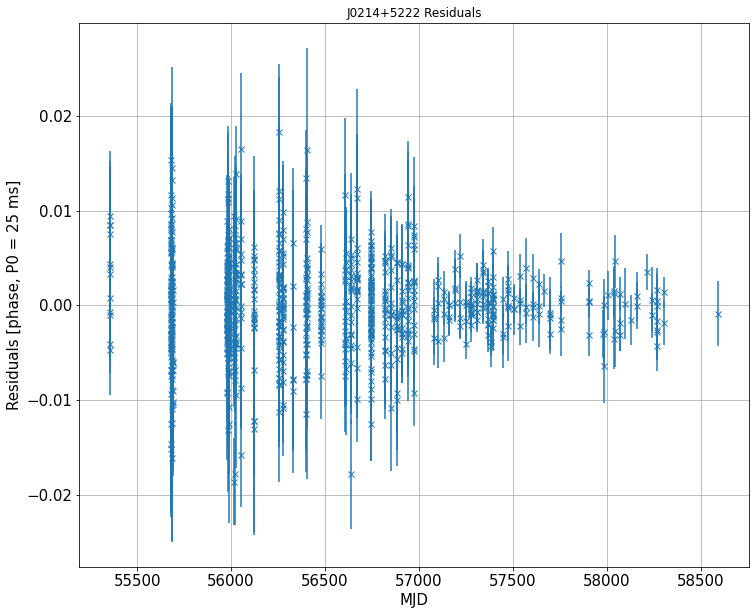

In [132]:
f=WLSFitter(toas,model,track_mode='use_pulse_numbers')

# BT params #
f.model.free_params=['F0','F1','RAJ','DECJ','PMRA','PMDEC','DM','FB0',
                     'TASC','A1','A1DOT','EPS1','EPS2','JUMP1','JUMP2','JUMP3']

f.fit_toas(maxiter=3)
mpt.plot_fit(toas,f.model)
f.print_summary()
f.model.compare(model,verbosity='check')

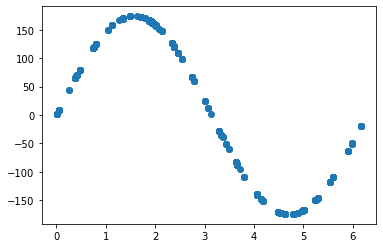

In [133]:
total_delay = f.model.binarymodel_delay(toas, None)
roemer_delay = f.model.components["BinaryELL1"].binary_instance.delayR()
Phi = f.model.components["BinaryELL1"].binary_instance.Phi()
plt.scatter(Phi, roemer_delay)

In [140]:
def Roemer_eqn(phis, e1, e2):
    yF = []

    for phi in phis:
        #Lange et al.
        RxL = np.sin(phi) + ( e2*np.sin(2.*phi) - e1*np.cos(2.*phi) ) / 2.

        #Zhu et al.

        RxZ = RxL - ( 5.*e2**2*np.sin(phi) - 3.*e2**2*np.sin(3.*phi) - 2.*e1*e2*np.cos(phi) + 6.*e1*e2*np.cos(3.*phi) + 3.*e1**2*np.sin(phi) + 3.*e1**2*np.sin(3.*phi) ) / 8.

        #Third-Order Expression

        RxF = RxZ - ( 3.*e1**2*e2*np.sin(2.*phi) + 5.*e2**3*np.sin(2.*phi) - 4.*e1**3*np.cos(2.*phi) - 6.*e1*e2**2*np.cos(2.*phi) - 4.*e2**3*np.sin(4.*phi) + 12.*e1**2*e2*np.sin(4.*phi) + 12.*e1*e2**2*np.cos(4.*phi) - 4.*e1**3*np.cos(4.*phi) ) / 12.

        yF.append(RxF)

    return np.array(yF)

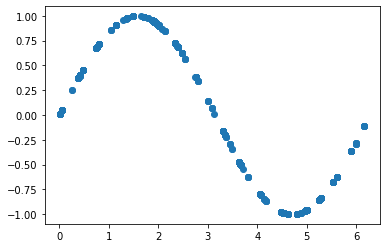

In [141]:
EPS1 = model["EPS1"]
EPS2 = model["EPS2"]
ys = Roemer_eqn(Phi.value, EPS1.value, EPS2.value)
plt.scatter(Phi, ys)

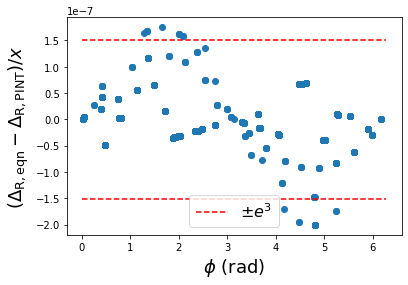

In [142]:
EPS1 = model["EPS1"].value
EPS2 = model["EPS2"].value

residuals = ys - (roemer_delay/model["A1"]).value

plt.scatter(Phi, residuals)

e = np.sqrt(EPS1**2 + EPS2**2)
order = 3
plt.plot([0.,2*np.pi],[e**order, e**order],c='r',ls='--',label=f'$\pm e^{order}$')
plt.plot([0.,2*np.pi],[-e**order, -e**order],c='r',ls='--')
plt.legend(fontsize=16)
plt.ylabel("$(\Delta_\mathrm{R, eqn} - \Delta_\mathrm{R, PINT})/x$",fontsize = 18)
plt.xlabel("$\phi$ (rad)",fontsize = 18)
plt.show()